In [1]:
import pymde
import pandas as pd
import numpy as np
# import umap
from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
import vaex
# vaex.multithreading.thread_count_default = 8
# import vaex.ml

In [2]:
sdss = pd.read_csv('/arc/home/aydanmckay/leftjoinpristinespecobjmilliquas.csv',
                   usecols=["CaHK_0_p","pmra_1_p","pmdec_1_p","g_chp_psf_p","r_chp_psf_p","i_chp_psf_p","z_chp_psf_p","y_chp_psf_p","MAG_AUTO_p",
                            "phot_g_mean_mag_1_p","phot_bp_mean_mag_1_p","phot_rp_mean_mag_1_p","CLASS_s","RA_q"])
sdss.CLASS_s.value_counts()

STAR      79150
QSO       75940
GALAXY    65401
Name: CLASS_s, dtype: int64

In [3]:
sdss = sdss.loc[(sdss["g_chp_psf_p"] < 1e19) & (sdss["r_chp_psf_p"] < 1e19) & (sdss["i_chp_psf_p"] < 1e19) & \
                        (sdss["z_chp_psf_p"] < 1e19) & (sdss["y_chp_psf_p"] < 1e19) & (sdss["MAG_AUTO_p"] < 95) & \
                        (np.isnan(sdss["pmra_1_p"]) == False) & (np.isnan(sdss["pmdec_1_p"]) == False) & \
                        (np.isnan(sdss["phot_g_mean_mag_1_p"]) == False) & (np.isnan(sdss["phot_bp_mean_mag_1_p"]) == False) & \
                        (np.isnan(sdss["phot_rp_mean_mag_1_p"]) == False) & (np.isnan(sdss['RA_q']) == True)]
sdss.CLASS_s.value_counts()

STAR      74165
GALAXY     9847
QSO         814
Name: CLASS_s, dtype: int64

In [4]:
sdss = sdss.replace({'CLASS_s':np.nan}, -1)
sdss = sdss.replace({'CLASS_s':'STAR'}, 1)
sdss = sdss.replace({'CLASS_s':'GALAXY'}, 2)
sdss = sdss.replace({'CLASS_s':'QSO'}, 3)

In [5]:
df_joined = vaex.from_pandas(pd.DataFrame({'PMRA': sdss['pmra_1_p'],
                   'PMDec': sdss['pmdec_1_p'],
                   'G_gaia': sdss["CaHK_0_p"]-sdss['phot_g_mean_mag_1_p'],
                   'B_gaia': sdss["CaHK_0_p"]-sdss['phot_bp_mean_mag_1_p'],
                   'R_gaia': sdss["CaHK_0_p"]-sdss['phot_rp_mean_mag_1_p'],
                   'G_pan': sdss["CaHK_0_p"]-sdss['g_chp_psf_p'],
                   'R_pan': sdss["CaHK_0_p"]-sdss['r_chp_psf_p'],
                   'I_pan': sdss["CaHK_0_p"]-sdss['i_chp_psf_p'],
                   'Z_pan': sdss["CaHK_0_p"]-sdss['z_chp_psf_p'],
                   'Y_pan': sdss["CaHK_0_p"]-sdss['y_chp_psf_p'],
                   'AUTO_cfis': sdss["CaHK_0_p"]-sdss['MAG_AUTO_p']},
                   index=np.arange(0,len(sdss))))
df2 = pd.DataFrame({'Class': sdss['CLASS_s']}, index = np.arange(0,len(sdss)))

In [6]:
print(df_joined.shape)
df_joined = df_joined.dropna()
print(df_joined.shape)
print(df2.shape)
df2 = df2.dropna()
print(df2.shape)

(3649568, 11)
(3254179, 11)
(3649568, 1)
(3254179, 1)


In [7]:
scaled_star_data = StandardScaler().fit_transform(df_joined)

In [8]:
scaled_star_data.shape

(3254179, 11)

Jan 24 02:19:19 AM: Computing 15-nearest neighbors, with max_distance=None
Mon Jan 24 02:19:20 2022 Building RP forest with 32 trees
Mon Jan 24 02:20:00 2022 NN descent for 22 iterations
	 1  /  22
	 2  /  22
	 3  /  22
	Stopping threshold met -- exiting after 3 iterations
Jan 24 02:24:12 AM: Computing quadratic initialization.


<AxesSubplot:>

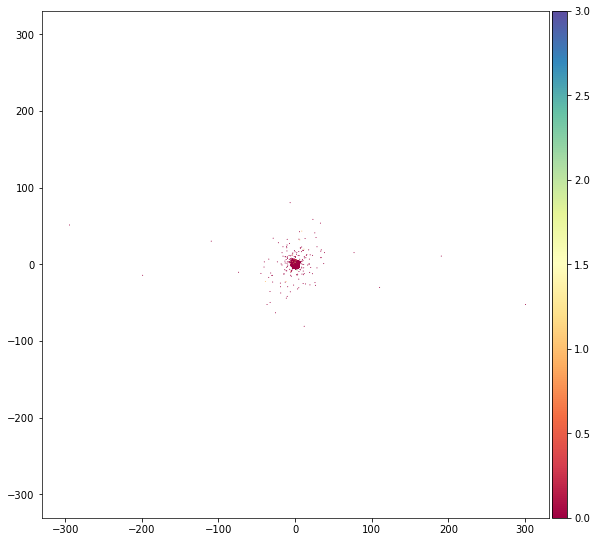

In [9]:
# mnist = pymde.datasets.MNIST()
# embedding = pymde.preserve_neighbors(mnist.data, embedding_dim=2, verbose=True).embed()
df2cmap = df2.replace(-1,0)
embedding = pymde.preserve_neighbors(scaled_star_data, embedding_dim=2, verbose=True).embed()
pymde.plot(embedding, color_by=df2cmap['Class'])

In [10]:
# mnist.data.shape